# The battle of neighborhoods : What is the best place where can I start my restaurant businessin New York?

### Imprt our libraries

In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import folium
import numpy as np
import requests

In [3]:
df1 = pd.read_csv('nyc.csv')
df1.drop(['id','host_id','name','host_name','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365'],inplace=True,axis=1)
df1.head()

,neighbourhood_group,neighbourhood,latitude,longitude
0,Brooklyn,Kensington,40.64749,-73.97237
1,Manhattan,Midtown,40.75362,-73.98377
2,Manhattan,Harlem,40.80902,-73.94190
3,Brooklyn,Clinton Hill,40.68514,-73.95976
4,Manhattan,East Harlem,40.79851,-73.94399


In [4]:
df1.drop_duplicates(subset='neighbourhood',keep='first',inplace=True)
df1.rename(columns={'neighbourhood':'neighborhood'},inplace=True)
df1.head()

,neighbourhood_group,neighborhood,latitude,longitude
0,Brooklyn,Kensington,40.64749,-73.97237
1,Manhattan,Midtown,40.75362,-73.98377
2,Manhattan,Harlem,40.80902,-73.94190
3,Brooklyn,Clinton Hill,40.68514,-73.95976
4,Manhattan,East Harlem,40.79851,-73.94399


In [5]:
CLIENT_ID = 'HLYURALRYFN0BU0OE0O3JXHRUQWM2AB2UWK5QQSIWGMZSVCC'
CLIENT_SECRET = 'KTQUU5VMSLQOBSVP3BQ5VPCQ5O2PCWNVAAVOBBIORH5JOQJN'
VERSION = '20180604'

In [7]:
radius = 500
LIMIT = 100
venues_list = []
for name,lat,lng in zip(df1['neighborhood'],df1['latitude'],df1['longitude']):
    print(name)
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            radius,
            LIMIT)
    results = requests.get(url).json()['response']['groups'][0]['items']
    venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
nyc_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nyc_venues.columns = columns
nyc_venues.head()

Kensington
Midtown
Harlem
Clinton Hill
East Harlem
Murray Hill
Bedford-Stuyvesant
Hell's Kitchen
Upper West Side
Chinatown
South Slope
West Village
Williamsburg
Fort Greene
Chelsea
Crown Heights
Park Slope
Windsor Terrace
Inwood
East Village
Greenpoint
Bushwick
Flatbush
Lower East Side
Prospect-Lefferts Gardens
Long Island City
Kips Bay
SoHo
Upper East Side
Prospect Heights
Washington Heights
Woodside
Brooklyn Heights
Carroll Gardens
Gowanus
Flatlands
Cobble Hill
Flushing
Boerum Hill
Sunnyside
DUMBO
St. George
Highbridge
Financial District
Ridgewood
Morningside Heights
Jamaica
Middle Village
NoHo
Ditmars Steinway
Flatiron District
Roosevelt Island
Greenwich Village
Little Italy
East Flatbush
Tompkinsville
Astoria
Clason Point
Eastchester
Kingsbridge
Two Bridges
Queens Village
Rockaway Beach
Forest Hills
Nolita
Woodlawn
University Heights
Gravesend
Gramercy
Allerton
East New York
Theater District
Concourse Village
Sheepshead Bay
Emerson Hill
Fort Hamilton
Bensonhurst
Tribeca
Shore Acres

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kensington,40.64749,-73.97237,Der Pioneer,40.645911,-73.972028,Bakery
1,Kensington,40.64749,-73.97237,Wheated,40.646610,-73.970564,Pizza Place
2,Kensington,40.64749,-73.97237,Hinterlands Bar,40.645985,-73.972050,Dive Bar
3,Kensington,40.64749,-73.97237,Parade Café,40.647499,-73.973951,Café
4,Kensington,40.64749,-73.97237,Werkstatt,40.645252,-73.970341,Austrian Restaurant


In [8]:
nyc_venues = nyc_venues[nyc_venues['Venue Category'].str.contains('Restaurant')]
nyc_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
4,Kensington,40.64749,-73.97237,Werkstatt,40.645252,-73.970341,Austrian Restaurant
6,Kensington,40.64749,-73.97237,La Loba Cantina,40.645657,-73.972814,Mexican Restaurant
7,Kensington,40.64749,-73.97237,Thai Farm Kitchen,40.644148,-73.976047,Thai Restaurant
11,Kensington,40.64749,-73.97237,Suzy's Roti Parlour,40.646618,-73.970269,Caribbean Restaurant
12,Kensington,40.64749,-73.97237,AM Thai Bistro,40.646810,-73.970162,Thai Restaurant


In [9]:
nyc_venues.rename(columns={'Venue Category':'Restaurant type'},inplace=True)
nyc_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Restaurant type
4,Kensington,40.64749,-73.97237,Werkstatt,40.645252,-73.970341,Austrian Restaurant
6,Kensington,40.64749,-73.97237,La Loba Cantina,40.645657,-73.972814,Mexican Restaurant
7,Kensington,40.64749,-73.97237,Thai Farm Kitchen,40.644148,-73.976047,Thai Restaurant
11,Kensington,40.64749,-73.97237,Suzy's Roti Parlour,40.646618,-73.970269,Caribbean Restaurant
12,Kensington,40.64749,-73.97237,AM Thai Bistro,40.646810,-73.970162,Thai Restaurant


[Text(0, 0, 'Austrian Restaurant'),
 Text(0, 0, 'Mexican Restaurant'),
 Text(0, 0, 'Thai Restaurant'),
 Text(0, 0, 'Caribbean Restaurant'),
 Text(0, 0, 'Thai Restaurant'),
 Text(0, 0, 'American Restaurant'),
 Text(0, 0, 'French Restaurant'),
 Text(0, 0, 'Middle Eastern Restaurant'),
 Text(0, 0, 'Thai Restaurant')]

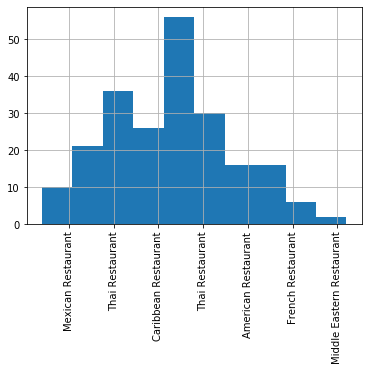

In [10]:
import matplotlib.pyplot as plt
ax = plt.subplot(111)
nyc_venues.groupby('Neighborhood')['Restaurant type'].count().hist()
ax.set_xticklabels(nyc_venues['Restaurant type'],rotation=90, ha="center")

In [11]:
nyc_restaurant_onehot = pd.get_dummies(nyc_venues[['Restaurant type']],prefix="",prefix_sep="")
nyc_restaurant_onehot.insert(loc=0, column='Neighborhood', value=nyc_venues['Neighborhood'] )
nyc_restaurant_onehot.shape

(1803, 83)

In [12]:
nyc_grouped = nyc_restaurant_onehot.groupby('Neighborhood').mean().reset_index()
nyc_grouped.head()

,Neighborhood,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Burmese Restaurant,...,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Yemeni Restaurant
0,Allerton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Arden Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arrochar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arverne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Astoria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [45]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nyc_grouped['Neighborhood']

for ind in np.arange(nyc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Italian Restaurant,Caribbean Restaurant,Fast Food Restaurant,Mexican Restaurant,Chinese Restaurant,Yemeni Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant
1,Arden Heights,Sushi Restaurant,Italian Restaurant,Restaurant,Yemeni Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
2,Arrochar,Italian Restaurant,Japanese Restaurant,Peruvian Restaurant,Polish Restaurant,Cajun / Creole Restaurant,Indonesian Restaurant,Indian Restaurant,Hotpot Restaurant,Himalayan Restaurant,Hawaiian Restaurant
3,Arverne,Eastern European Restaurant,Caribbean Restaurant,Yemeni Restaurant,Halal Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant
4,Astoria,Empanada Restaurant,Eastern European Restaurant,Italian Restaurant,South American Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Greek Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant


In [46]:
from sklearn.cluster import KMeans

kclusters = 5
nyc_grouped_clustering = nyc_grouped.drop('Neighborhood',1)

kmeans = KMeans(n_clusters=kclusters,random_state=0).fit(nyc_grouped_clustering)

kmeans.labels_[0:10]

array([2, 0, 2, 4, 0, 2, 0, 2, 2, 4])

In [48]:
df1.rename(columns={'neighborhood':'Neighborhood'},inplace=True)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
nyc_merged = df1
nyc_merged = nyc_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'),on='Neighborhood')


In [49]:
nyc_merged.head()

,neighbourhood_group,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Kensington,40.64749,-73.97237,0.0,Thai Restaurant,Middle Eastern Restaurant,American Restaurant,French Restaurant,Austrian Restaurant,Mexican Restaurant,Caribbean Restaurant,Hawaiian Restaurant,Fast Food Restaurant,Filipino Restaurant
1,Manhattan,Midtown,40.75362,-73.98377,0.0,Sushi Restaurant,French Restaurant,Mediterranean Restaurant,Indian Restaurant,Chinese Restaurant,Yemeni Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,German Restaurant
2,Manhattan,Harlem,40.80902,-73.94190,0.0,Southern / Soul Food Restaurant,Sushi Restaurant,Spanish Restaurant,Comfort Food Restaurant,Seafood Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Hotpot Restaurant,Himalayan Restaurant,Ethiopian Restaurant
3,Brooklyn,Clinton Hill,40.68514,-73.95976,1.0,American Restaurant,African Restaurant,Italian Restaurant,Cuban Restaurant,Mexican Restaurant,Southern / Soul Food Restaurant,New American Restaurant,Greek Restaurant,Fast Food Restaurant,Filipino Restaurant
4,Manhattan,East Harlem,40.79851,-73.94399,1.0,Mexican Restaurant,African Restaurant,Chinese Restaurant,Italian Restaurant,Latin American Restaurant,Puerto Rican Restaurant,French Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant


In [60]:
nyc_merged.shape

(219, 15)

In [66]:
from geopy.geocoders import Nominatim 

address = 'NYC'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [67]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium 

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['latitude'], nyc_merged['longitude'], nyc_merged['Neighborhood'], nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters